In [45]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Environment

In [46]:
# Environment definition
INITIAL_MEAN = 0
INITIAL_STD = 0.3
RANDOM_WALK_MEAN = 0
RANDOM_WALK_STD = 0.01

means = None
stds = None

def reset():
    global means, stds
    means = np.ones(10) * INITIAL_MEAN
    stds = np.ones(10) * INITIAL_STD

def reward(lever):
    return np.random.normal(means[lever], stds[lever])

def random_walk_q_stars():
    global means
    means += np.random.normal(np.ones(10) * RANDOM_WALK_MEAN, np.ones(10) * RANDOM_WALK_STD, 10)

## Table based solution

In [47]:
# Table solution
def solve(epsilon, alpha, steps):
    reset()
    qs = np.zeros(10)
    ns = np.zeros(10)
    rs = np.zeros(steps) # Plotted rewards
    for step in range(steps):
        # Decide to exploit or explore using epsilon-greedy.
        if np.random.rand() > epsilon:
            # Exploit.
            a = np.argmax(qs)
        else:
            # Explore.
            a = np.random.randint(10)
        # Update solution with observed reward.
        r = reward(a)
        ns[a] += 1
        qs[a] += alpha(ns[a]) * (r - qs[a])
        rs[step] = r
        # Update env.
        random_walk_q_stars()
    return rs

def solve_avg(epsilon, alpha, steps, runs):
    return np.average(np.array([solve(epsilon, alpha, steps) for _ in range(runs)]), axis=0)

## Experiments

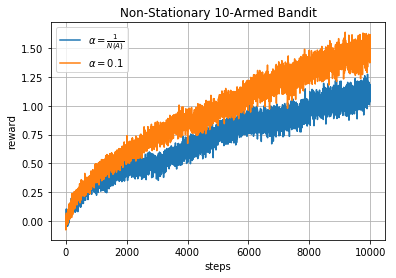

In [49]:
STEPS = 10000
EPSILON = 0.1
RUNS = 100 # Number of runs from which to take the avg.

# Sample average step rate (should work better on stationary problems)
rs_sample_average = solve_avg(EPSILON, lambda na: 1.0 / na, STEPS, RUNS)
# Constant step rate (should work better on non-stationary problems)
rs_alpha_constant_alpha = solve_avg(EPSILON, lambda _: 0.1, STEPS, RUNS)

# Plot
fig, ax = plt.subplots()
steps = np.arange(STEPS)
ax.plot(steps, rs_sample_average, label=r"$\alpha = \frac{1}{N(A)}$")
ax.plot(steps, rs_alpha_constant_alpha, label=r"$\alpha = 0.1$")

ax.set(xlabel='steps', ylabel='reward',
       title='Non-Stationary 10-Armed Bandit')
ax.grid()
ax.legend()